In [1]:
import networkx as nx
from operator import add, sub

import numpy as np
import matplotlib.pyplot as plt
from main_definitions import *
import random
import copy
import python_springrank.tools as tl
from statistics import mean
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from load_datasets import *

In [2]:
dataframe_perf_gains = pd.DataFrame(columns=["Performance gain over SpringRank", "Method", "Dataset"])
dataframe_perf_gains

,Performance gain over SpringRank,Method,Dataset


In [8]:
results_by_dataset = {}

reverse = False
min_iter = 20
print_rate = 100
cut_off_change = 0.1
max_iter = 1000
print_stuff = False

num_of_runs_on_dataset = 30

In [9]:
datasets = ["Wikipedia Admin Votes", "DBLP Citations" , "Faculty Hiring (History)", "Faculty Hiring (CS)",
                "Faculty Hiring (Business)","Corporate Ownership", "Political Blog Links", "C. Elegans Neural", "Drosophila Medulla"]

In [10]:
for dataset in datasets:

    DG = load_dataset(dataset)

    mapping = dict(zip(DG, range(0, DG.number_of_nodes())))
    relabelled_DG = nx.relabel_nodes(DG, mapping)


    print("Running for dataset ", dataset)

    for i in range(num_of_runs_on_dataset):
        print("     iteration ", i)
        reduced_graph, removed_edges = reduce_graph(relabelled_DG, perc_edge_del=0.2)

        basic_pagerank = generalised_page_rank(reduced_graph, self_loop_weight = 0, alpha = 1,
                                   page_size = 0, end_normalise = False, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        postrank_backflow = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                           page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                           backflow = True, backflow_const = 0.2,
                           min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                           cut_off_change = cut_off_change, print_stuff=False)

        springrank = get_spring_ranks(reduced_graph, with_rounding = False)


        perf_basic_pagerank = perc_correct(removed_edges, basic_pagerank)
        perf_springrank = perc_correct(removed_edges, springrank)
        perf_postrank_backflow = perc_correct(removed_edges, postrank_backflow)

        perf_gain_pagerank = perf_basic_pagerank - perf_springrank
        perf_gain_postrank_backflow = perf_postrank_backflow - perf_springrank

        pagerank_row = {"Performance gain over SpringRank": perf_gain_pagerank, "Method": "PageRank", "Dataset": dataset}
        #postrank_row_no_backflow = {"Performance gain over PageRank": perf_gain_postrank_no_backflow, "Method": "PostRank w/out backflow (beta = 0)", "Dataset": dataset}
        postrank_row_backflow = {"Performance gain over SpringRank": perf_gain_postrank_backflow, "Method": "PostRank", "Dataset": dataset}


        dataframe_perf_gains = dataframe_perf_gains.append(pagerank_row, ignore_index=True)
        #dataframe_perf_gains = dataframe_perf_gains.append(postrank_row_no_backflow, ignore_index=True)
        dataframe_perf_gains = dataframe_perf_gains.append(postrank_row_backflow, ignore_index=True)


Running for dataset  Wikipedia Admin Votes
     iteration  0
     iteration  1
     iteration  2
     iteration  3
     iteration  4
     iteration  5
     iteration  6
     iteration  7
     iteration  8
     iteration  9
     iteration  10
     iteration  11
     iteration  12
     iteration  13
     iteration  14
     iteration  15
     iteration  16
     iteration  17
     iteration  18
     iteration  19
     iteration  20
     iteration  21
     iteration  22
     iteration  23
     iteration  24
     iteration  25
     iteration  26
     iteration  27
     iteration  28
     iteration  29
Running for dataset  DBLP Citations
     iteration  0
     iteration  1
     iteration  2
     iteration  3
     iteration  4
     iteration  5
     iteration  6
     iteration  7
     iteration  8
     iteration  9
     iteration  10
     iteration  11
     iteration  12
     iteration  13
     iteration  14
     iteration  15
     iteration  16
     iteration  17
     iteration  18
     itera

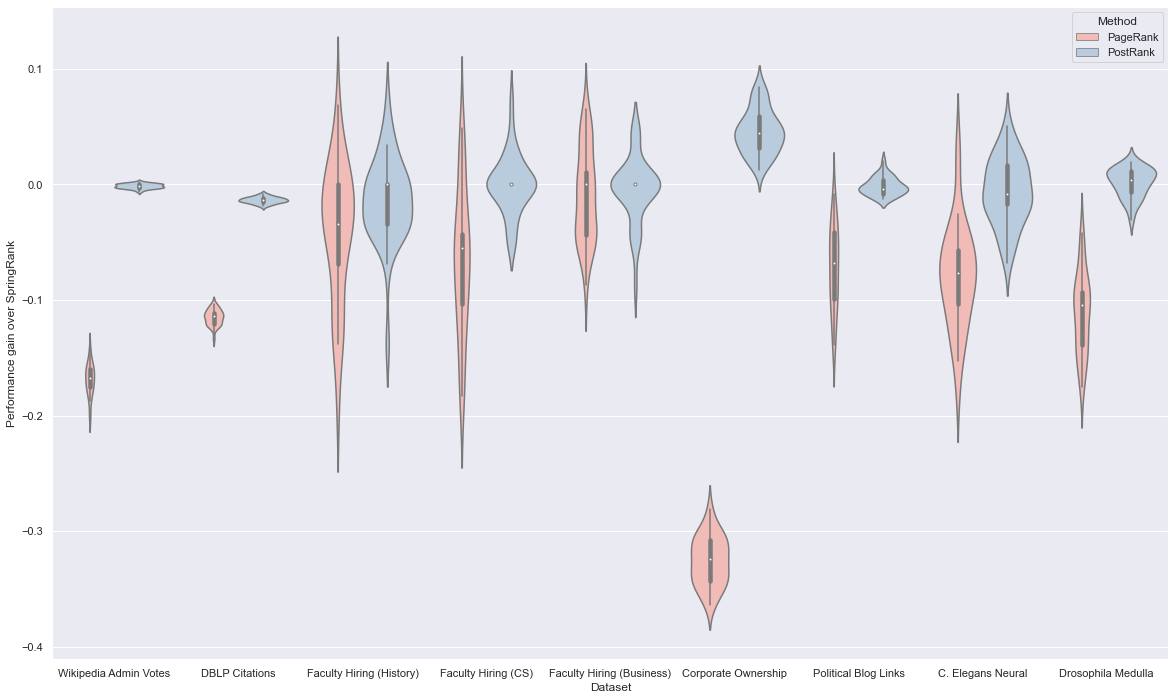

In [11]:
sns.set(rc={'figure.figsize':(20,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over SpringRank", hue="Method", data=dataframe_perf_gains, palette="Pastel1")
plt.show()

<ipython-input-36-932e61620661>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_yticklabels([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5], size = 15)


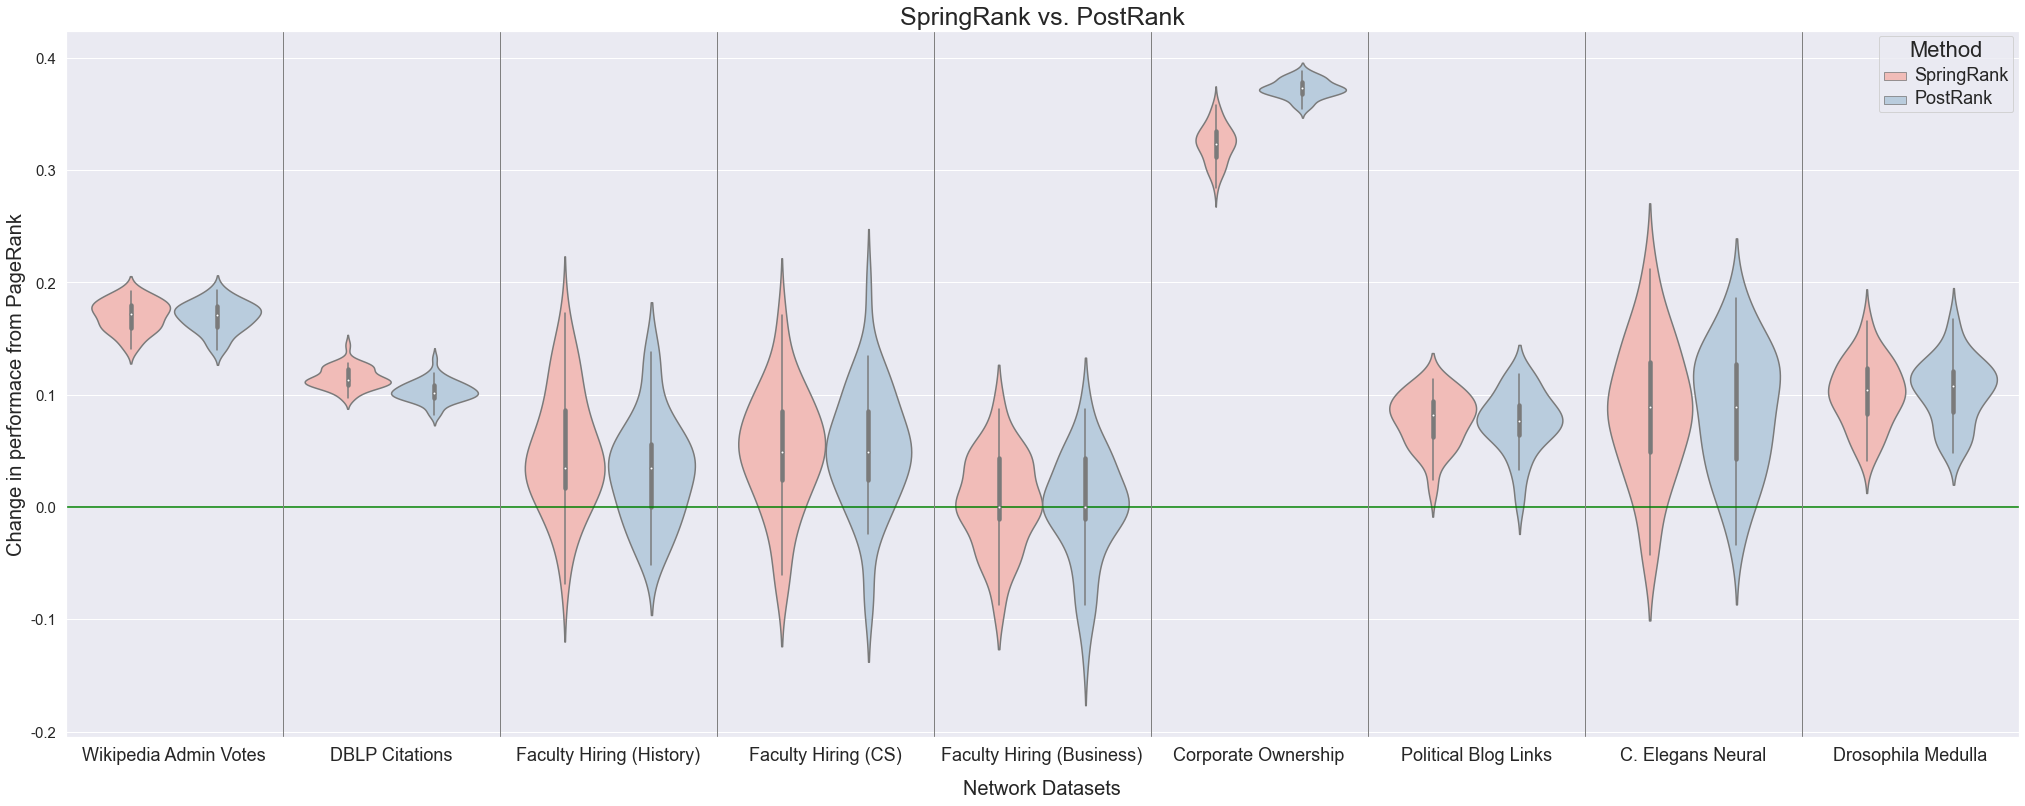

In [36]:
sns.set(rc={'figure.figsize':(35,13)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over PageRank", hue="Method", data=dataframe_perf_gains, palette=sns.color_palette("Pastel1")
, width=0.8)

sns_plot.axes.set_title("SpringRank vs. PostRank",fontsize=25)
sns_plot.set_xlabel("Network Datasets",fontsize=20)
sns_plot.set_ylabel("Change in performace from PageRank",fontsize=20)
y_ticks = sns_plot.get_yticks()
sns_plot.set_yticklabels([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5], size = 15)
sns_plot.set_xticklabels(datasets, size = 18)
sns_plot.xaxis.labelpad = 15
sns_plot.axhline(y=0, color='green')
plt.setp(sns_plot.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(sns_plot.get_legend().get_title(), fontsize='22') # for legend title
for i in range(len(np.unique(dataframe_perf_gains['Dataset'])) - 1):
    sns_plot.axvline(i + 0.5, color='grey', lw=1)


sns_plot.figure.savefig("SpringRank_vs_PostRank.png")
plt.show()

In [21]:
sns_plot.get_yticks()


array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])